In [1]:
################################################################################
# Implementation of the solution to the Hamburger moment problem from          #
# Kovalishina's paper.
################################################################################

# from utils import *
import utils
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from importlib import reload

import sys
sys.path.append('/Users/patrickoare/lqcd/utilities')
import pytools as pyt
import plottools as pt
import formattools as fmt
pt.set_font()
default_style = fmt.styles['notebook']
default_style['colwidth'] = 15

sys.path.append('./will_scripts')
import hamburger_mp as ham              # Will code base

# set precision
PRECISION = 100
mp.dps       = PRECISION
utils.mp.dps = PRECISION
ham.mp.dps   = PRECISION

In [2]:
corr = ham.ToyModel(nt=30, nstates=32).correlator

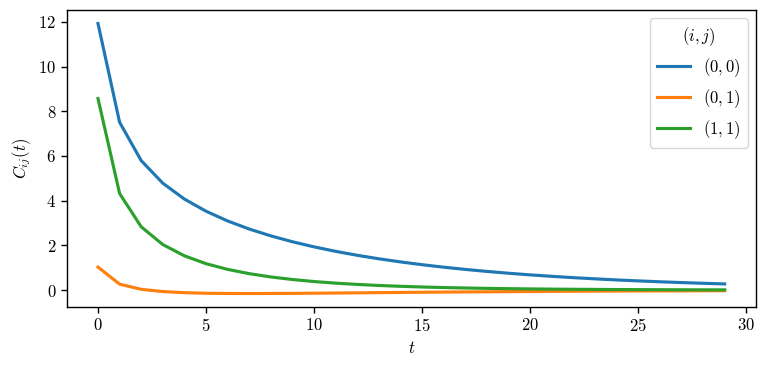

In [3]:
plot_style = default_style.copy()
plot_style['colwidth'] = 8
plot_style['fontsize'] = 12

fig, axes = pt.add_subplots(style = plot_style)
ax = axes[0]
tt = np.arange(corr.shape[0])
pt.plot_1d_data(tt, corr[:, 0, 0], ax = ax, col = pt.pal[0], ax_label = [r'$t$', r'$C_{ij}(t)$'], fn_label = r'$(0, 0)$', style = plot_style)
pt.plot_1d_data(tt, corr[:, 0, 1], ax = ax, col = pt.pal[1], ax_label = [r'$t$', r'$C_{ij}(t)$'], fn_label = r'$(0, 1)$', style = plot_style)
pt.plot_1d_data(tt, corr[:, 1, 1], ax = ax, col = pt.pal[2], ax_label = [r'$t$', r'$C_{ij}(t)$'], fn_label = r'$(1, 1)$', style = plot_style)
plt.legend(title = r'$(i, j)$', title_fontsize = plot_style['fontsize'], fontsize = plot_style['fontsize'], bbox_to_anchor=(1, 1))

In [4]:
corr = ham.ToyModel(nt=30, nstates=32).correlator

In [ ]:
reload(utils)
# zaxis = np.array([mp.mpc('0.1', '0.1')])
# zaxis = np.array([mp.mpc('0.001', '0.001')])
zaxis = np.array([mp.exp(-mp.mpc('0.001', '0.001'))])
print(zaxis[0])
H = utils.Hankel(corr)
print(H.isPSD())
# H2 = ham.compute_hankel(corr)
# H - H2 should be 0

Ham = utils.Hamburger(H)
Ham(zaxis)
Ham.map_back()

(0.9990000003331666999999984130951940035281383945375612041299994335125054121387889013414423133038364014 - 0.0009990003333333000111095238095678924170274170171407075190143980409287191356744123721412200798852376014j)
True
[[mpc(real='530258979307771.3510030216473953977571008981798071456373241590832427545434341107448573903220485582117006', imag='-12553757614818.16093031556793217833873880389564437498493909149014294985227681227906757310589421454195791')
  mpc(real='44341508430865.29366231952712714113461579731995571006095989826759117613483700696739168972906037972976243', imag='-1074887345486.013211981572723285350603666253883890765591820497124720095196076449850313886259914479604645')
  mpc(real='-19472407125728347.57299377836162626825384457021138054726143662042472170775971588666039951949306946707055', imag='461152819316344.9908588338504396452250980931262155458487340055923448898581625929551289023819477742050926')
  mpc(real='-4657786056045448.6024204786242781017804258827768445810413414826196339

(array([[[mpf('-0.6046672708766697314560952356764774904885277648799541729004593127460119116130448707932866796010586239848')],
         [mpf('0.042303529372647857413525001729008113840119961839749927608521453539306066786093826448379250446918511898')]],
 
        [[mpf('0.042303529372647857413525001729008113840119961839749927608521453539306066786093826448379250446918511898')],
         [mpf('-0.1059076313577667214186935089212773033066498614291431872158867514026053906596895002694780758024755965605')]]],
       dtype=object),
 array([[[mpf('-0.6046672708766699439797828027672719810908952311245635481365568254444590909493674751153804638522356124826')],
         [mpf('0.04230352937264784248186399374933762283872802576205729179134918300465668903876929581038211900105562328316')]],
 
        [[mpf('0.04230352937264784248186399374933762283872802576205729179134918300465668903876929581038211900105562328316')],
         [mpf('-0.10590763135776672246777421615696749552177567987953440756662014251571534388